In [1]:
# データ加工・処理・分析ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn

# 小数第3位まで表示
%precision 3

'%.3f'

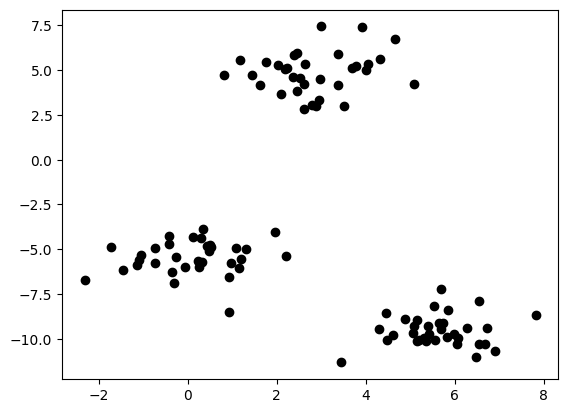

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

x, _ = make_blobs(random_state=10)
plt.scatter(x[:,0], x[:,1], color="black")

In [8]:
kmeans = KMeans(init="random", n_clusters=3)
kmeans.fit(x)
y_pred = kmeans.predict(x)

In [9]:
y

array([2, 2, 1, 0, 1, 1, 0, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 1, 0, 1, 0, 2,
       1, 2, 0, 1, 1, 1, 1, 0, 2, 1, 1, 0, 2, 2, 2, 1, 1, 1, 2, 0, 2, 2,
       1, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 0,
       0, 2, 2, 2, 1, 0, 1, 1, 2, 1, 1, 2, 0, 0, 0, 1, 0, 1, 2, 1, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0])

In [12]:
merged = pd.concat([pd.DataFrame(x[:,0]), pd.DataFrame(x[:,1]), pd.DataFrame(y_pred)], axis=1)
merged.columns = ["feat1", "feat2", "cluster"]

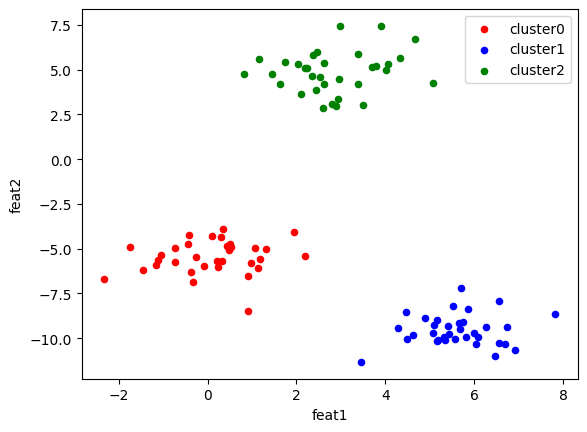

In [16]:
ax = None
colors = ["red", "blue", "green"]
for i, data in merged.groupby("cluster"):
    ax = data.plot.scatter(x="feat1", y="feat2", color=colors[i], label=f"cluster{i}", ax=ax)

In [17]:
# webからデータを取得したり、zipファイルを扱うためのライブラリをインポート
import requests, zipfile
import io

# データがあるurl の指定
zip_file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'

# データを取得して展開する
r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [18]:
bank = pd.read_csv("bank-full.csv", sep=";")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [19]:
bank.shape

(45211, 17)

In [22]:
bank.isnull().sum().sum()

0

In [23]:
from sklearn.preprocessing import StandardScaler
bank_sub = bank[["age", "balance", "campaign", "previous"]]
sc = StandardScaler()
sc.fit(bank_sub)
bank_sub_std = sc.transform(bank_sub)
bank_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   campaign  45211 non-null  int64
 3   previous  45211 non-null  int64
dtypes: int64(4)
memory usage: 1.4 MB


In [27]:
kmeans = KMeans(init="random", n_clusters=6, random_state=0)
kmeans.fit(bank_sub_std)

labels = pd.Series(kmeans.labels_, name="cluster_number")

Text(0, 0.5, 'count')

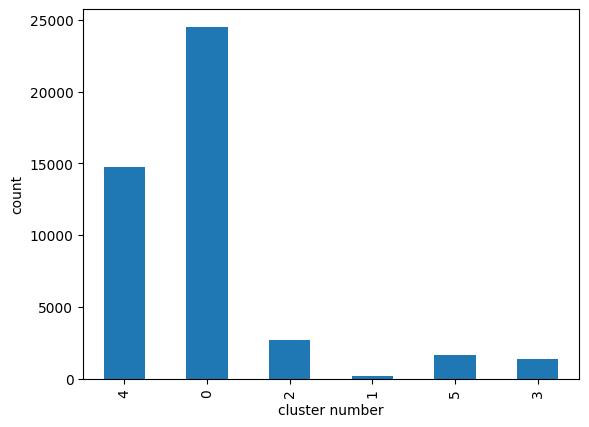

In [28]:
ax = labels.value_counts(sort=False).plot(kind="bar")
ax.set_xlabel("cluster number")
ax.set_ylabel("count")

In [5]:
from sklearn.preprocessing import StandardScaler
sample = np.random.RandomState(1)
x = np.dot(sample.rand(2, 2), sample.randn(2, 200)).T
sc = StandardScaler()
x_std = sc.fit_transform(x)
print(sp.stats.pearsonr(x_std[:, 0], x_std[:, 1]))

PearsonRResult(statistic=0.8893899540010721, pvalue=3.125333452016969e-69)


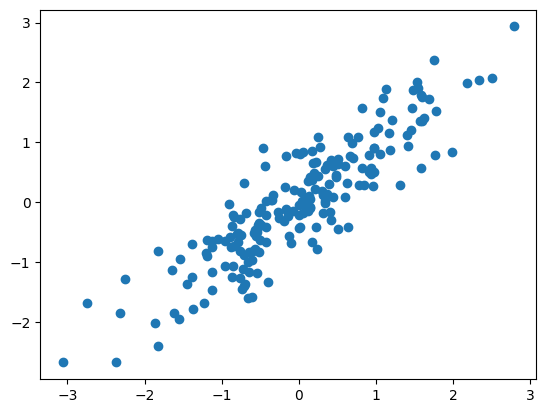

In [6]:
plt.scatter(x_std[:, 0], x_std[:, 1])

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x_std)

PCA(n_components=2)

In [8]:
pca.components_

array([[-0.707, -0.707],
       [-0.707,  0.707]])

In [9]:
pca.explained_variance_

array([1.899, 0.111])

In [17]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

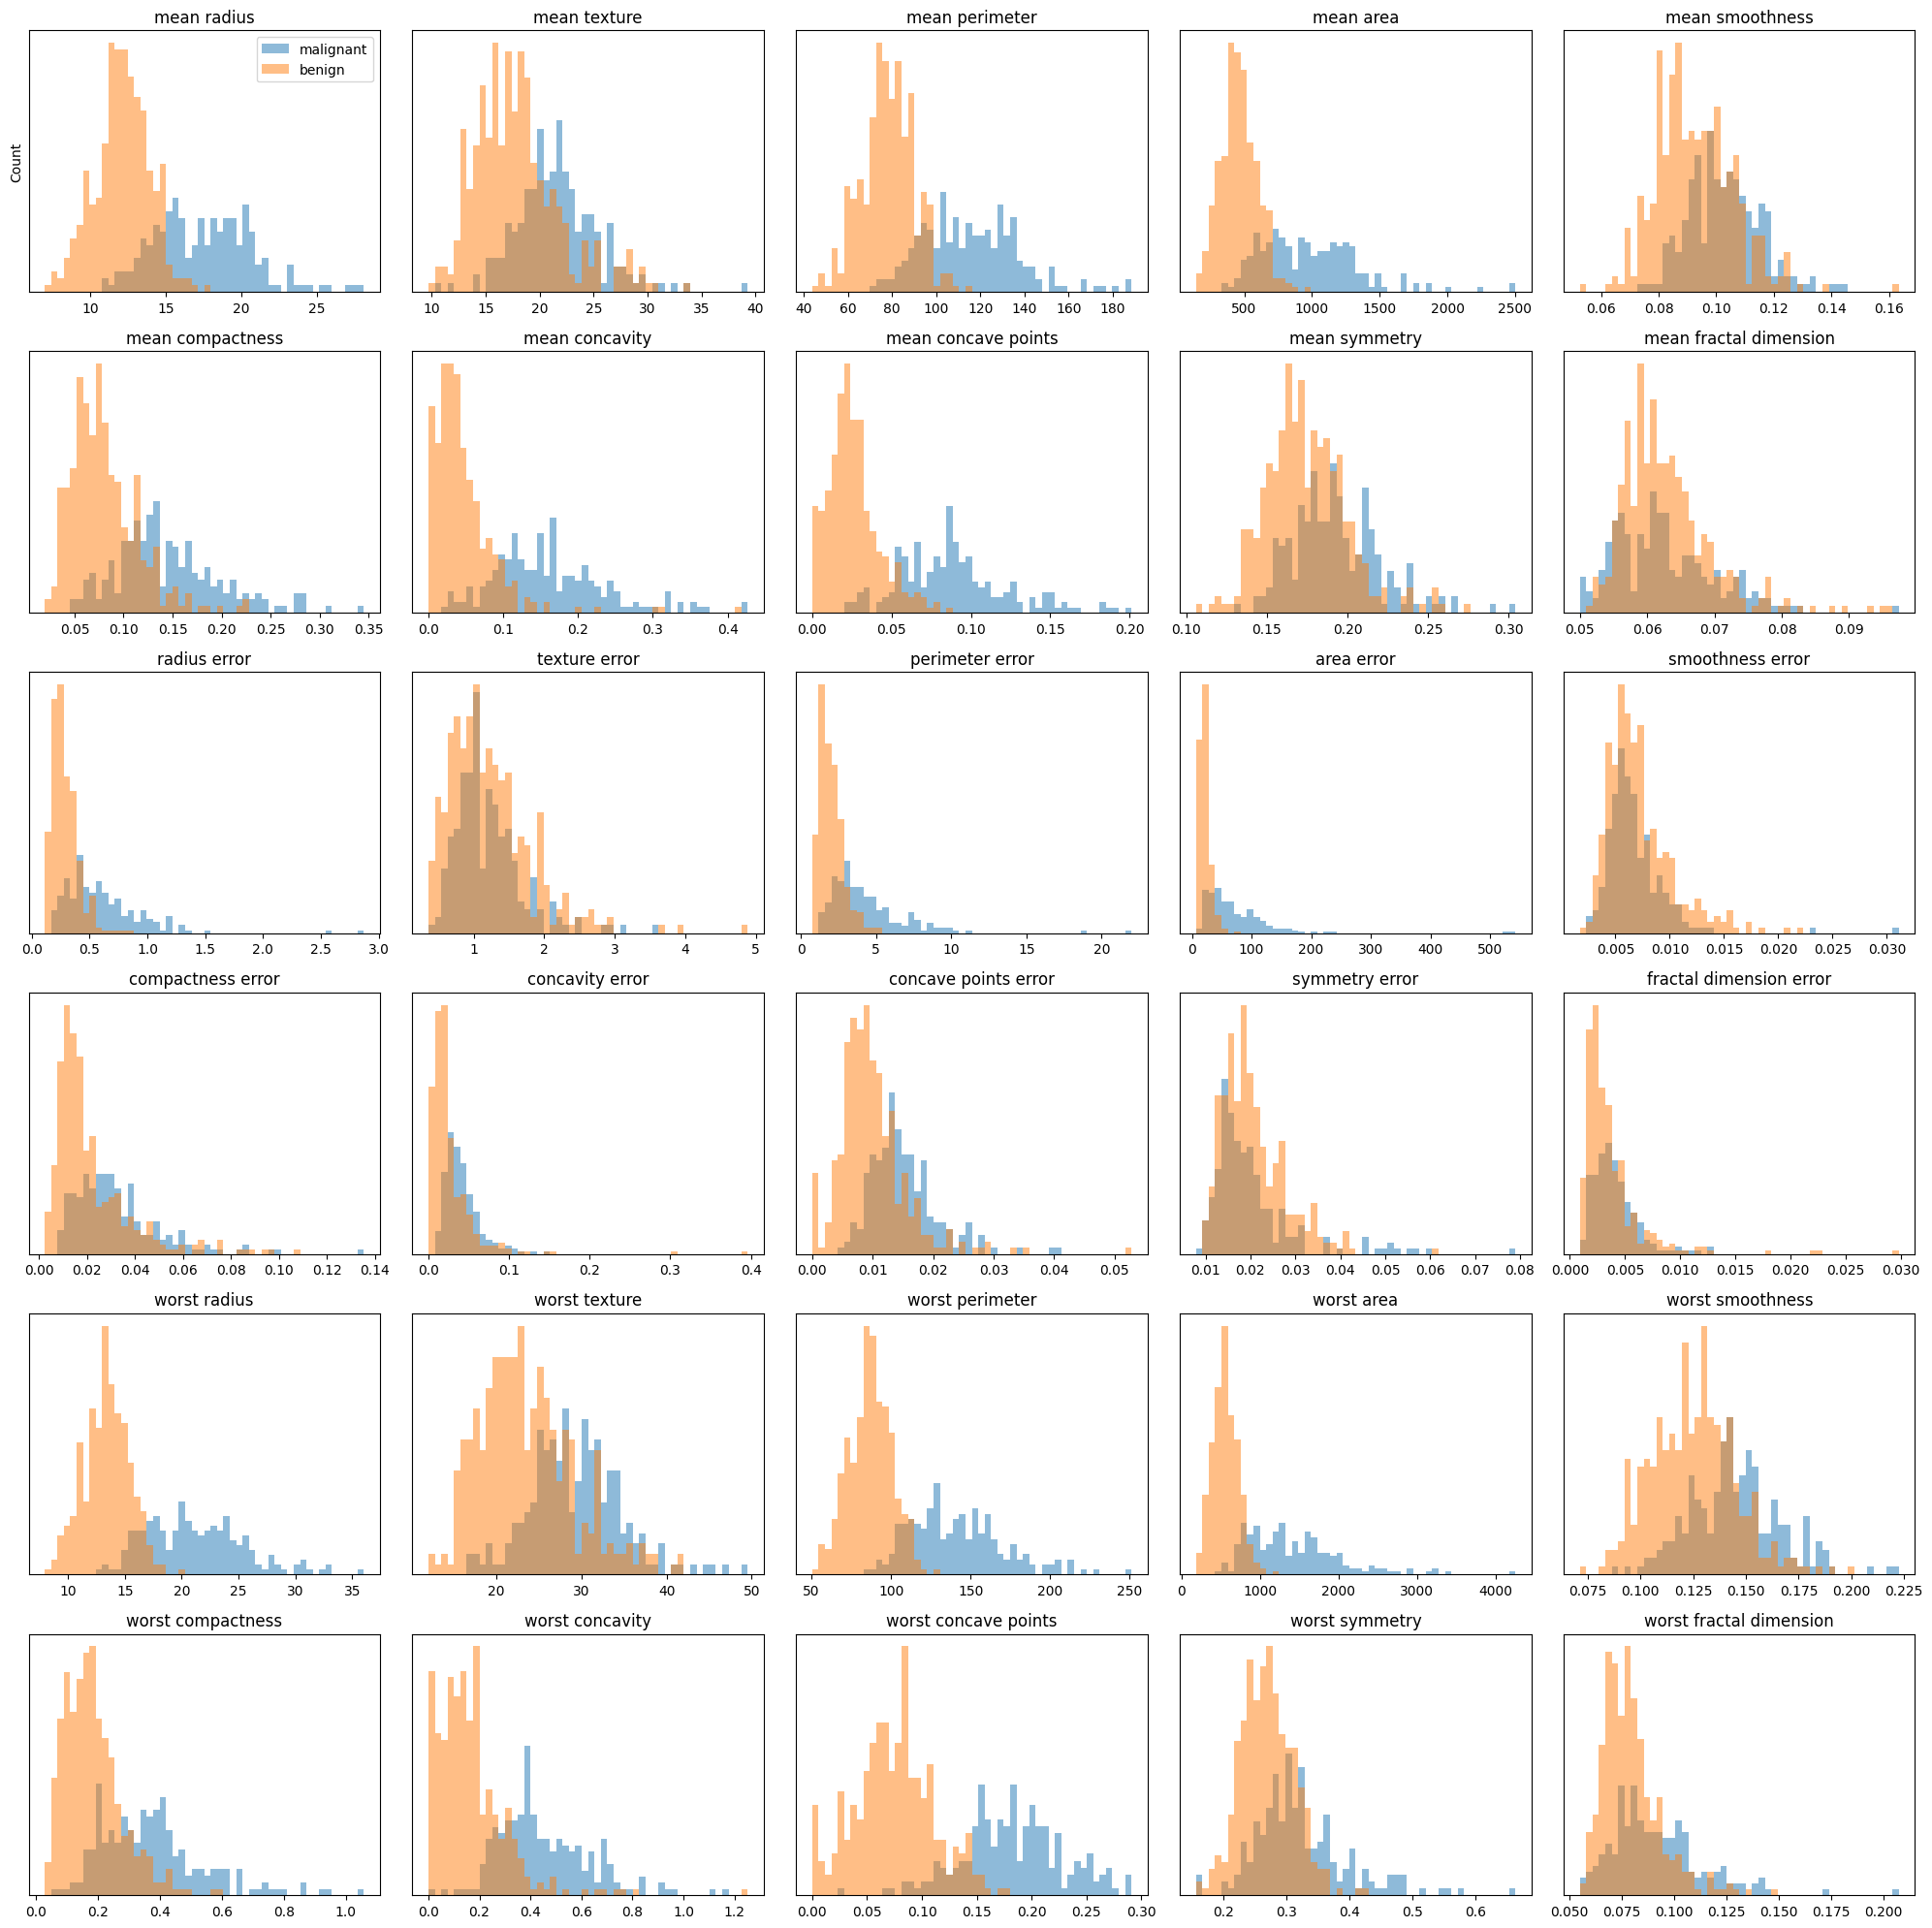

In [18]:
fig, axes = plt.subplots(6,5,figsize=(20,20))
ax = axes.ravel()
for i in range(30):
    _,bins = np.histogram(cancer.data[:,i], bins=50)
    ax[i].hist(malignant[:,i], bins, alpha=.5)
    ax[i].hist(benign[:,i], bins, alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
# ラベルの設定
ax[0].set_ylabel('Count')
ax[0].legend(['malignant','benign'],loc='best')
fig.tight_layout()

In [19]:
sc = StandardScaler()
x_std = sc.fit_transform(x)
pca = PCA(n_components=2)
pca.fit(x_std)
x_pca = pca.transform(x_std)

In [20]:
x_pca = pd.DataFrame(x_pca, columns=["pc1", "pc2"])
x_pca

,pc1,pc2
0,0.939714,0.191168
1,-2.137392,0.545842
2,1.441077,-0.356127
3,3.132742,0.749342
4,1.540483,-0.690894
...,...,...
195,-1.327738,-0.053903
196,-0.224926,-0.254327
197,-3.098237,-0.201585
198,1.861588,0.098387


In [21]:
x_pca = pd.concat([x_pca, pd.DataFrame(cancer.target, columns=["target"])], axis=1)
pca_bad = x_pca[x_pca["target"] == 0]
pca_good = x_pca[x_pca["target"] == 1]

In [23]:
trans = pd.read_excel("Online Retail.xlsx", sheet_name="Online Retail")
trans.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [24]:
trans.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [25]:
trans["cancel_flg"] = trans.InvoiceNo.map(lambda x: str(x)[0])
trans.groupby("cancel_flg").size()

cancel_flg
5    532618
A         3
C      9288
dtype: int64

In [26]:
trans = trans[(trans.cancel_flg == "5") & (trans.CustomerID.notnull())]

In [28]:
trans.groupby("cancel_flg").size()

cancel_flg
5    397924
dtype: int64

In [29]:
trans["StockCode"].value_counts().head(5)

85123A    2035
22423     1724
85099B    1618
84879     1408
47566     1397
Name: StockCode, dtype: int64

In [30]:
trans_all = set(trans.InvoiceNo)

In [33]:
trans_a = set(trans[trans["StockCode"]=="85123A"].InvoiceNo)
len(trans_a)

1978

In [34]:
trans_b = set(trans[trans["StockCode"]=="85099B"].InvoiceNo)
len(trans_b)

1600